# Tổng quan học máy (Phần 1)

## Giới thiệu

**Học máy** (machine learning) là các kĩ thuật xây dựng **mô hình** (model) tự động từ **dữ liệu** (data). Các mô hình này mô tả quan hệ giữa các **biến** (variable) mà ta quan tâm. Các mô hình thường được **tham số hóa** (parameterized) và việc **học** (learning) là việc dùng dữ liệu để điều chỉnh giá trị cho các tham số để tối ưu mục tiêu cụ thể nào đó, tức là **học từ dữ liệu** (learning from data).

Học máy có 2 mục đích chính là **dự đoán** (prediction) và **hiểu** (understanding) dữ liệu. 

Học máy thường được xem là một lãnh vực con của **Trí tuệ Nhân tạo** (Artificial Intelligence) và là tập các kĩ thuật quan trọng trong **Khoa học Dữ liệu** (Data Science).

Các kĩ thuật học máy chính là:
 - **Học có giám sát** (supervised learning) với mục đích chính là dự đoán, gồm
    - **Phân lớp** (classification) nếu muốn dự đoán loại, nhóm (discrete label)
    - **Hồi qui** (regression) nếu muốn dự đoán giá trị số (continuous value)
 - **Học không giám sát** (unsupervised learning) với mục đích chính là hiểu dữ liệu
    - **Gom cụm** (clustering) nếu muốn phân chia dữ liệu thành các cụm tương đồng nhau
    - **Giảm chiều** (dimensionality reduction) nếu muốn tìm các biểu diễn đơn giản hơn cho dữ liệu
 - Ngoài ra còn có các kĩ thuật khác như **Học bán giám sát** (semisupervised), **Học tăng cường** (reinforcement), ...

**Scikit-Learn** (https://scikit-learn.org/stable/) là thư viện cung cấp các thuật toán học máy phổ biến trong Python. Scikit-Learn thường được gọi ngắn gọn là **sklearn**.

Tài liệu tham khảo: [Getting started](https://scikit-learn.org/stable/getting_started.html), [Examples](https://scikit-learn.org/stable/auto_examples/index.html), [User guide](https://scikit-learn.org/stable/user_guide.html), [Reference](https://scikit-learn.org/stable/modules/classes.html#api-ref).

In [1]:
import numpy as np
import pandas as pd

import sklearn
sklearn.__version__

'1.3.1'

## Các bước tiến hành một thuật toán học máy với sklearn

### Bước 1 - Chuẩn bị dữ liệu

Tùy theo bài toán học máy muốn thực hiện, ta cần chuẩn bị dữ liệu phù hợp để **huấn luyện** (training) và **kiểm tra** (testing) mô hình học máy.

Ví dụ sau dùng bộ dữ liệu `Iris Dataset`

In [2]:
iris = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Giả sử ta muốn thực hiện bài toán phân lớp: dự đoán giống hoa (setosa hay versicolor hay virginica) dựa vào 4 số đo sepal_length, sepal_width, petal_length, petal_width. 

Ta tách bảng dữ liệu ra 2 phần:
  - Phần các **đặc trưng** (feature) dùng để dự đoán (gọi là `X`)
  - Phần **nhãn lớp** (class label) cho các giống (gọi là `y`)

In [4]:
X = iris.drop("species", axis=1).to_numpy()
X[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Phần đặc trưng (`X`) nên bố trí như là mảng 2 chiều NumPy với các dòng là các **mẫu dữ liệu** (sample) và các cột là các đặc trưng (kích thước `n_samples` x `n_features`).

In [5]:
y = iris.species.to_numpy()
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

Phần nhãn lớp (`y`) nên bố trí như là mảng 1 chiều NumPy.

Với bộ dữ liệu `Iris Dataset`, ta có thể chuẩn bị nhanh hơn với sklearn.

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()

In [7]:
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Vì ta không chỉ huấn luyện mà còn kiểm tra mô hình học máy nên ta sẽ tách bộ dữ liệu ra thành 2 phần: 1 phần để huấn luyện và 1 phần để đánh giá.

Ta nên chọn ngẫu nhiên từ bộ dữ liệu khoảng 80% mẫu để huấn luyện và phần còn lại dùng để đánh giá. sklearn hỗ trợ việc phân chia này.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [12]:
print(len(y_train), len(y_test))

120 30


### Bước 2 - Chọn thuật toán học máy

Tùy theo mô hình - thuật toán mong muốn mà ta dùng lớp phù hợp trong sklearn rồi tạo đối tượng thuật toán với các **siêu tham số** (hyperparameter) phù hợp.

Ví dụ sau dùng thuật toán Logistic Regression. Thuật toán này được cài đặt trong lớp `LogisticRegression` của `sklearn.linear_model` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [13]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(max_iter=200)

### Bước 3 - Huấn luyện mô hình trên dữ liệu huấn luyện

In [14]:
alg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Hàm `fit` giúp tìm các giá trị tối ưu cho các tham số của mô hình từ dữ liệu huấn luyện.

### Bước 4 - Kiểm tra mô hình đã huấn luyện trên dữ liệu kiểm tra

Dùng mô hình đã huấn luyện để dự đoán trên bộ dữ liệu kiểm tra.

In [15]:
y_pred = alg.predict(X_test)

In [16]:
print(y_test[:10])
print(y_pred[:10])

[2 1 0 2 0 2 0 1 1 1]
[2 1 0 2 0 2 0 1 1 1]


Dùng độ đo đánh giá phù hợp để đánh giá mô hình đã huấn luyện.

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

Ở đây ta dùng **độ chính xác** (accuracy score) để đánh giá. 

Mô hình cho kết quả dự đoán rất tốt trên bộ dữ liệu kiểm tra (chính xác 100%).

### Bước 5 - Dùng mô hình đã huấn luyện (và kiểm tra) để dự đoán cho dữ liệu mới

In [18]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

Giả sử ta có bông hoa với 4 số đo lần lượt là [5, 3, 3, 1], ta có thể dùng mô hình trên để dự đoán giống của bông hoa này.

In [19]:
X_new = np.array([5, 3, 3, 1]).reshape(-1, 4)
X_new

array([[5, 3, 3, 1]])

In [20]:
y_new = alg.predict(X_new)
print(y_new)
print(iris.target_names[y_new])

[1]
['versicolor']


## Ví dụ minh họa học có giám sát - Phân lớp bộ dữ liệu Iris

Các bước để tiến hành phân lớp ở trên có thể được gom lại như sau.

In [21]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

alg = LogisticRegression(max_iter=200)
alg.fit(X_train, y_train)

y_pred = alg.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

**Bài tập**. Chạy lại ví dụ trên với thay đổi: dùng 20% dữ liệu để huấn luyện. Nhận xét.

**Bài tập**. Chạy lại ví dụ trên với thay đổi: dùng 80% dữ liệu để huấn luyện nhưng siêu tham số `max_iter` nhận giá trị 5. Nhận xét.

**Bài tập**. Chạy lại ví dụ trên với thay đổi: dùng thuật toán cây quyết định, `DecisionTreeClassifier` trong `sklearn.tree` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

## Ví dụ minh họa học không giám sát - Gom cụm bộ dữ liệu Iris

Tương tự như việc thực hiện các bài toán học máy khác, bước đầu tiên là chuẩn bị dữ liệu.

Ví dụ này dùng bộ dữ liệu `Iris Dataset`.

In [22]:
iris = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Ta đã biết, nhãn lớp `species` cho biết giống hoa. Nhãn này đước "gán" bởi các "chuyên gia sinh học".

Nay ta thử "gán nhãn tự động" bởi thuật toán học máy. Tức là từ 4 đặc trưng sepal_length, sepal_width, petal_length, petal_width ta **gom cụm** (clustering) các mẫu hoa thành 3 cụm. Hơn nữa, ta sẽ đối chiếu để xem kết quả gom cụm tự động có "giống" với kết quả gán nhãn của các chuyên gia.

Ta tách riêng phần các đặc trưng vào ma trận `X`.

In [24]:
X = iris.drop("species", axis=1).to_numpy()
X[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Ở đây ta không cần chia bộ dữ liệu thành dữ liệu huấn luyện và đánh giá như trong học có giám sát vì ta sẽ tự đối chiếu kết quả để đánh giá.

Tiếp theo, ta chọn một thuật toán gom cụm là "Gauss trộn" (Gaussian mixture model). Thuật toán này được cài đặt bởi lớp `GaussianMixture` trong `sklearn.mixture` (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Hơn nữa, ta đặt siêu tham số `n_components` giá trị 3 để chỉ ta muốn gom thành 3 cụm.

In [25]:
from sklearn.mixture import GaussianMixture

alg = GaussianMixture(n_components=3)

Tiếp theo, ta huấn luyện mô hình trên dữ liệu.

In [26]:
alg.fit(X)

GaussianMixture(n_components=3)

Rồi dùng mô hình đã huấn luyện để gom cụm trên chính bộ dữ liệu.

In [27]:
clusters = alg.predict(X)

Ta thêm nhãn cụm này vào bảng `Iris` để đối chiếu với nhãn giống hoa.

In [28]:
iris["cluster"] = np.char.add("cluster ", clusters.astype("str"))

Ta thử đối chiếu kết quả gom cụm tự động với nhãn được gán bởi chuyên gia.

In [29]:
idx = np.random.randint(len(X), size=10)
iris.loc[idx, ["species", "cluster"]]

,species,cluster
109,Iris-virginica,cluster 2
147,Iris-virginica,cluster 2
98,Iris-versicolor,cluster 0
35,Iris-setosa,cluster 1
1,Iris-setosa,cluster 1
115,Iris-virginica,cluster 2
73,Iris-versicolor,cluster 0
50,Iris-versicolor,cluster 0
31,Iris-setosa,cluster 1
54,Iris-versicolor,cluster 0


Ta thấy kết quả rất tốt (gần như gom cụm tự động cũng ra các cụm như các giống xác định bởi chuyên gia).

Ta cũng có thể vẽ biểu đồ để đối chiếu.

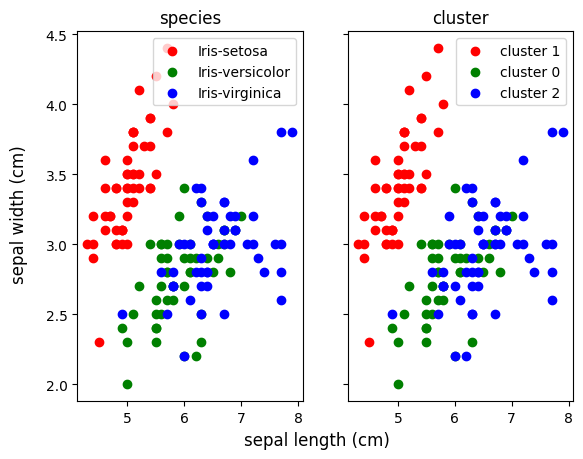

In [30]:
import matplotlib.pyplot as plt

colors = ["red", "green", "blue"]
fig, ax = plt.subplots(1, 2, sharey=True)

for specie, color in zip(iris.species.unique(), colors):
    x = iris.sepal_length[iris.species == specie]
    y = iris.sepal_width[iris.species == specie]
    ax[0].scatter(x, y, c=color, label=specie)
ax[0].legend()
ax[0].set_title("species")

for cluster, color in zip(iris.cluster.unique(), colors):
    x = iris.sepal_length[iris.cluster == cluster]
    y = iris.sepal_width[iris.cluster == cluster]
    ax[1].scatter(x, y, c=color, label=cluster)
ax[1].legend()
ax[1].set_title("cluster")

fig.supxlabel("sepal length (cm)")
fig.supylabel("sepal width (cm)")

plt.show()

Ta thấy thuật toán gom cụm cho kết quả gần giống như kết quả gán nhãn của chuyên gia!!!

**Bài tập**. Chạy lại ví dụ trên với thay đổi: chỉ phân thành 2 cụm. Nhận xét.

**Bài tập**. Chạy lại ví dụ trên với thay đổi: chỉ dùng 2 đặc trưng là sepal_length, sepal_width để gom cụm. Nhận xét.

**Bài tập**. Chạy lại ví dụ trên với thay đổi: dùng thuật toán K-means, lớp `KMeans` trong `sklearn.cluster` (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).